In [7]:
#导入常用库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import missingno as msno
import math
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [8]:
data=pd.read_csv(r"E:\大学\综合项目实践\processed_data.csv")

In [9]:
data.head()

,Date,Discharge,Dayl,Prcp,Srad,Swe,Tmax,Tmin,Vp,Prcp_lag_1,...,Tmax_lag_6,Srad_lag_6,Discharge_lag_6,Prcp_lag_7,Tmax_lag_7,Srad_lag_7,Discharge_lag_7,Year,Month,Day
0,2000-01-08,49.0,32486.4,1.77,161.63,0.0,1.54,-6.54,374.92,0.00,...,6.99,214.92,39.0,0.00,1.56,204.85,39.0,2000,1,8
1,2000-01-09,46.0,32486.4,0.00,168.24,0.0,0.82,-6.76,369.02,1.77,...,11.65,176.35,44.0,0.00,6.99,214.92,39.0,2000,1,9
2,2000-01-10,83.0,32832.0,0.00,150.35,0.0,4.09,-2.70,503.67,0.00,...,11.61,143.33,77.0,2.58,11.65,176.35,44.0,2000,1,10
3,2000-01-11,120.0,32832.0,18.22,72.23,0.0,4.75,0.67,637.65,0.00,...,11.80,188.99,91.0,8.58,11.61,143.33,77.0,2000,1,11
4,2000-01-12,79.0,32832.0,1.19,138.55,0.0,4.07,-2.58,507.84,18.22,...,-2.70,208.24,55.0,13.93,11.80,188.99,91.0,2000,1,12


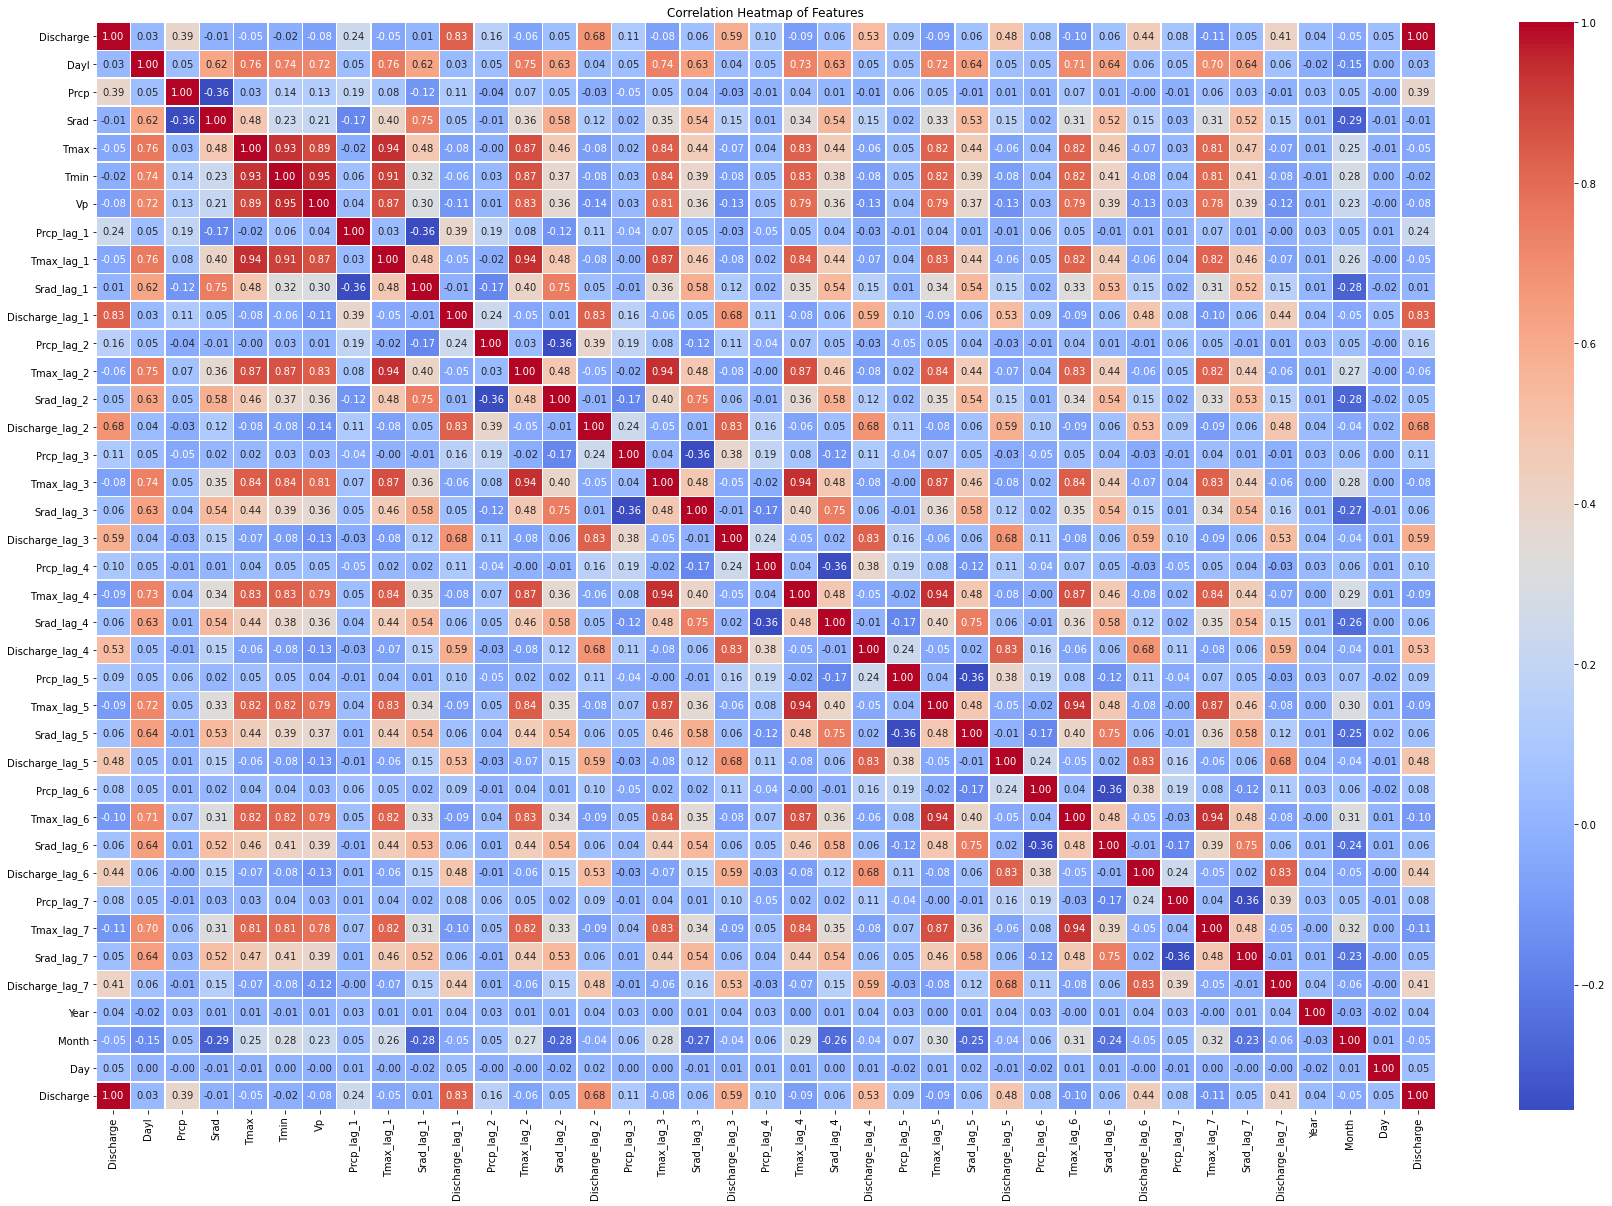

In [10]:
# 划分特征和目标变量
#X = data.drop(columns=['Discharge'])
X=data.drop(columns=['Swe','Date'])
y = data['Discharge']

# 划分数据集
train_years = 1461  # 前4年的数据
X_train, X_test = X[:train_years], X[train_years:]
y_train, y_test = y[:train_years], y[train_years:]
# 使用相关系数进行特征选择
correlation_matrix = pd.concat([X_train, y_train], axis=1).corr()

# 绘制热力图
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Heatmap of Features")
plt.show()

In [11]:
import pandas as pd
import os
import glob

# 输入文件夹路径和输出文件夹路径
input_folder = './dataset02'  # 原始数据文件夹路径
output_folder = 'data_day_4'  # 处理后数据文件夹路径

# 如果输出文件夹不存在，则创建
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# 读取所有CSV文件
all_files = glob.glob(os.path.join(input_folder, "*.csv"))

# 需要创建滞后特征的天数
num_days = 4

# 特征列
features = [ 'Prcp', 'Discharge']

# 处理每个文件
for file in all_files:
    # 读取数据
    data = pd.read_csv(file)

    # 构建滑动窗口特征
    for i in range(1, num_days + 1):
        for feature in features:
            # 创建滞后特征列，列名格式为 <特征名>_lag_<i>
            data[f'{feature}_lag_{i}'] = data[feature].shift(i)

    # 去掉包含 NaN 值的行
    data.dropna(inplace=True)

    # 生成输出文件路径
    output_file = os.path.join(output_folder, os.path.basename(file))

    # 保存处理后的数据集到新文件
    data.to_csv(output_file, index=False)

    print(f"Processed data saved to '{output_file}'.")

print("All files processed.")


Processed data saved to 'data_day_4\01333000.csv'.
Processed data saved to 'data_day_4\01350000.csv'.
Processed data saved to 'data_day_4\01350080.csv'.
Processed data saved to 'data_day_4\01350140.csv'.
Processed data saved to 'data_day_4\01365000.csv'.
Processed data saved to 'data_day_4\01411300.csv'.
Processed data saved to 'data_day_4\01413500.csv'.
Processed data saved to 'data_day_4\01414500.csv'.
Processed data saved to 'data_day_4\01415000.csv'.
Processed data saved to 'data_day_4\01423000.csv'.
Processed data saved to 'data_day_4\01434025.csv'.
Processed data saved to 'data_day_4\01435000.csv'.
Processed data saved to 'data_day_4\01439500.csv'.
Processed data saved to 'data_day_4\01440000.csv'.
Processed data saved to 'data_day_4\01440400.csv'.
Processed data saved to 'data_day_4\01451800.csv'.
Processed data saved to 'data_day_4\01466500.csv'.
Processed data saved to 'data_day_4\01484100.csv'.
Processed data saved to 'data_day_4\01485500.csv'.
Processed data saved to 'data_d